# <b>Loading libraries</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


# <b>Loading dataset</b>

In [2]:
#I want to predict if password strenght is 0,1,2 given a various features 

#passwords=pd.read_csv (r"C:\Users\yuval\data.csv")#import DATASET to the notebook
#passwords
data = pd.read_csv(r"C:\Users\yuval\data.csv", error_bad_lines=False)
data

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# <b>know and organize the dataset</b>

In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(669640, 2)

In [4]:
#see how many values are in strength column
set(data["strength"].to_list())

{0, 1, 2}

**Explanation about the columns:**<br>

**What are the features?**<br>
password-object consists of numbers and letters. <br>

**What is the response?**<br>
strength-as we saw,and as it already wrote in Kaggle -three values(0 , 1 , 2)- 0 for weak, 1 for medium, 2 for strong.<br>

**What else do we know?**<br>
There are 669640  observations (represented by the rows)

In [5]:
#To get quick description of the data,particular about the total number of rows, 
#each attribute’s type, and the number of nonnull values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
#I want to check what the range of all strength column: 
data.describe()
#i can see that the range is like they wrote in kaggle-0-2, and the mean strength for all the column is 0.990196

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


# <b>Duplicates values</b>

In [7]:
#if there are duplicate passwords-i want to delete it
data=data.drop_duplicates(subset=['password'],keep=False)#remove duplicates on specifics columns
data
#as we can see the number of rows still the same, so there are no duplicate values

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


# <b>Nan values</b>

In [8]:
#check for null values
print(data.isnull().sum())


password    1
strength    0
dtype: int64


In [9]:
#ill check the NaN value of the column password    
NaNPass=data[data['password'].isna()]
NaNPass

,password,strength
367579,NaN,0


In [10]:
#i have no need of this value, so ill delete this 
data.dropna(axis=0,inplace=True)
#ill check again to make sure   
NaNPass=data[data['password'].isna()]
NaNPass

,password,strength


In [11]:
#I deletes 1 row from the dataset because of case of Nan value, we will write it by precent:
print ("Percent of NaN values i deleted:", (1*100)/669640 ,"%")

Percent of NaN values i deleted: 0.00014933397049160743 %


In [12]:
#lets see how many password get any strength
data["strength"].value_counts()

1    496801
0     89701
2     83137
Name: strength, dtype: int64

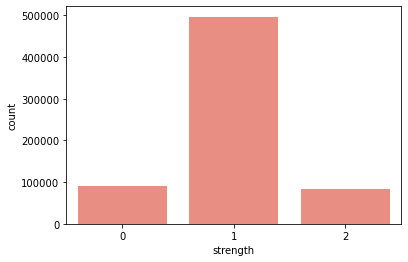

In [13]:
#now, lets see it by graph
sns.countplot(data["strength"],data=data,color="salmon")

**conclusion from the graph**<br>
most passwords have strength of 1, means medium strength.<br>

In [14]:
#i would like to create new column of pass_len represent the lenght of each password
#first of all, ill turn the type of column 'password' to string, so all the types will be the same, and also mor comfortable to work with string.len()
data['password']=data['password'].astype(str)


In [15]:
#create the new colimn
data['pass_len']=data['password'].str.len()#in every cell put the length of the password
#also can be write as:
#data['pass_len']=data['password'].apply(lambda x: len(x))
data

,password,strength,pass_len
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11
...,...,...,...
669635,10redtux10,1,10
669636,infrared1,1,9
669637,184520socram,1,12
669638,marken22a,1,9


In [16]:
#see what values are in pass_len column (its very long so i put it in comment)
#set(data["pass_len"].to_list())
#see how many password have certain lenght value(also very long so i put it in comment)
#data["pass_len"].value_counts()

In [17]:
#lets find max and min lenghts of the passwords
print ("The longest password length is:",data["pass_len"].max())
print ("The shortest password length is:",data["pass_len"].min())

#lets see what is the most common password length
print ("The most common password length is:",data["pass_len"].value_counts().idxmax(),"(" ,data["pass_len"].value_counts().max(),"passwords)" )

#now lets see the less common password length
dftemp=data.groupby(["pass_len"]).count()
dftemp#we can see that when it count 1, those are the less common passwords length
dft=dftemp.query('password == "1"')#we will extract from the df all passwords that count only one time 

print ("The less common passwords lengths are:",dft.index.to_list(), "(1 password for each length)")


The longest password length is: 220
The shortest password length is: 1
The most common password length is: 9 ( 144490 passwords)
The less common passwords lengths are: [33, 37, 39, 48, 64, 68, 100, 147, 185, 192, 220] (1 password for each length)


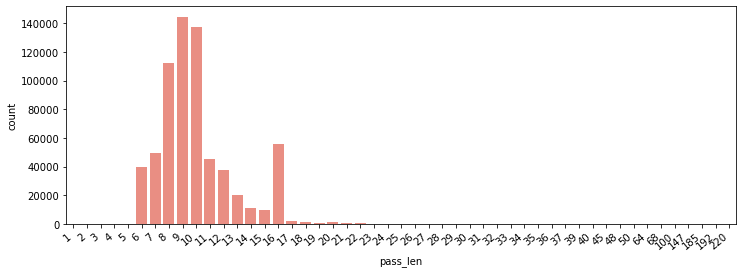

In [18]:
#lets show it in graph
plt.figure(figsize=(12,4)) # this creates a figure 12 inch wide, 4 inch high
gr=sns.countplot(data["pass_len"],data=data,color="salmon")#define my axis
gr.set_xticklabels(gr.get_xticklabels(), rotation=40, ha="right")#by this row i rotate the ticklabels
plt.show()

**Conclusion from the graph**<br>
Most passwords have lenght of 8,9,10<br>

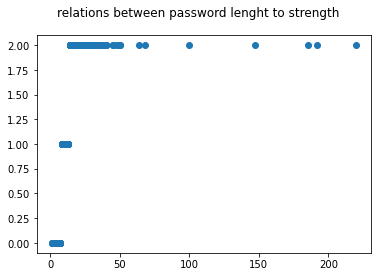

In [19]:
#now i would like to see what the relations between password lenght to its strength

plt.suptitle('relations between password lenght to strength')
plt.scatter(data['pass_len'],data['strength'])


**conclusion**<br>
All passwords with lenght bigger than 50 , have strong strength.

i would like to create new columns of:<br>
**'Num_Slett'**-represent the number of small letters in each password<br>
**'Num_Clett'**-represent the number of capital letters in each password<br>
**'Num_Space'**-represent the number of spaces in each password<br>
**'Num_dig'**-represent the number of digits in each password<br>
**'Num_Oth'**-represent the number of other signs in each password<br>


In [20]:
#create new column Num_dig represent the number of digits in each password
data ['Num_dig']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()]))
#create new column Num_Space represent the number of spaces in each password
data ['Num_Space']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isspace()]))
#create new column Num_Slett represent the number of small letters in each password
data ['Num_Slett']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).islower()]))
#create new column Num_Clett represent the number of capital letters in each password
data ['Num_Clett']= data['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isupper()]))
#create new column Num_Oth represent the number of other signs in each password
data ['Num_Oth']= data['pass_len']-data['Num_dig']-data['Num_Space']-data['Num_Slett']-data['Num_Clett']
data.tail(20)#present the last 20 rows in the df

,password,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
669620,7598692aaa,1,10,7,0,3,0,0
669621,ain151090,1,9,6,0,3,0,0
669622,weslley.06888524,2,16,8,0,7,0,1
669623,nt7hm2p5w,1,9,3,0,6,0,0
669624,dxipqgtch507,1,12,3,0,9,0,0
669625,skate11223,1,10,5,0,5,0,0
669626,reeta456456,1,11,6,0,5,0,0
669627,sakaryal&#305;,2,14,3,0,8,0,3
669628,mario3391,1,9,4,0,5,0,0
669629,wen2cin2,1,8,2,0,6,0,0


## <b>Visualize Relations between columns<b><br>
    Let's visualize the relationship between the features and the response,
    means, visualize relationship between strength values to the columns below:<br>
    Num_dig, Num_Space, Num_Slett, Num_Clett, Num_Oth.

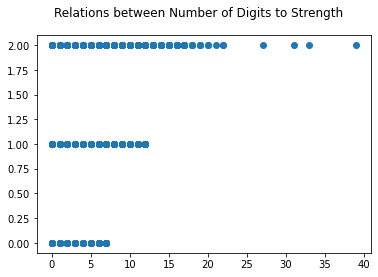

In [21]:
#plot Relations between Number of Digits to Strength
plt.suptitle('Relations between Number of Digits to Strength')
plt.scatter(data['Num_dig'],data['strength'])

**conclusion**<br>
All passwords with more than 15 digits, have strong (2) strength .

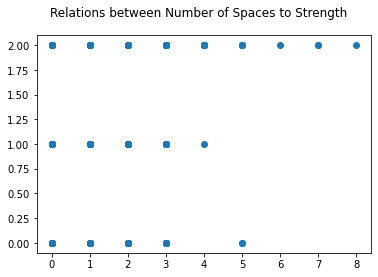

In [22]:
#plot Relations between Number of Spaces to Strength
plt.suptitle('Relations between Number of Spaces to Strength')
plt.scatter(data['Num_Space'],data['strength'])

**conclusion**<br>
All passwords with more than 5 spaces, have strong strength.

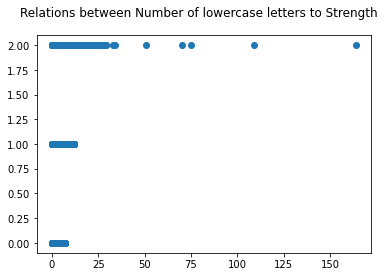

In [23]:
#plot Relations between Number of lowercase letters to Strength
plt.suptitle('Relations between Number of lowercase letters to Strength')
plt.scatter(data['Num_Slett'],data['strength'])

**conclusion**<br>
All passwords with more than 25 lowercase letters, have strong strength.

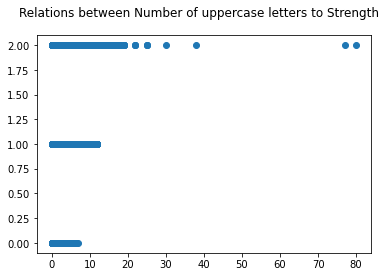

In [24]:
#plot Relations between Number of uppercase letters to Strength
plt.suptitle('Relations between Number of uppercase letters to Strength')
plt.scatter(data['Num_Clett'],data['strength'])

**conclusion**<br>
All passwords with more than 20 uppercase letters, have strong strength.

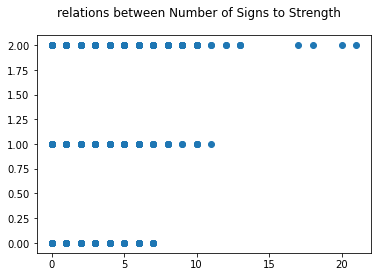

In [25]:
#plot Relations between Number of signs to Strength
plt.suptitle('relations between Number of Signs to Strength')
plt.scatter(data['Num_Oth'],data['strength'])

**conclusion**<br>
All passwords with more than 15 signs, have strong strength.

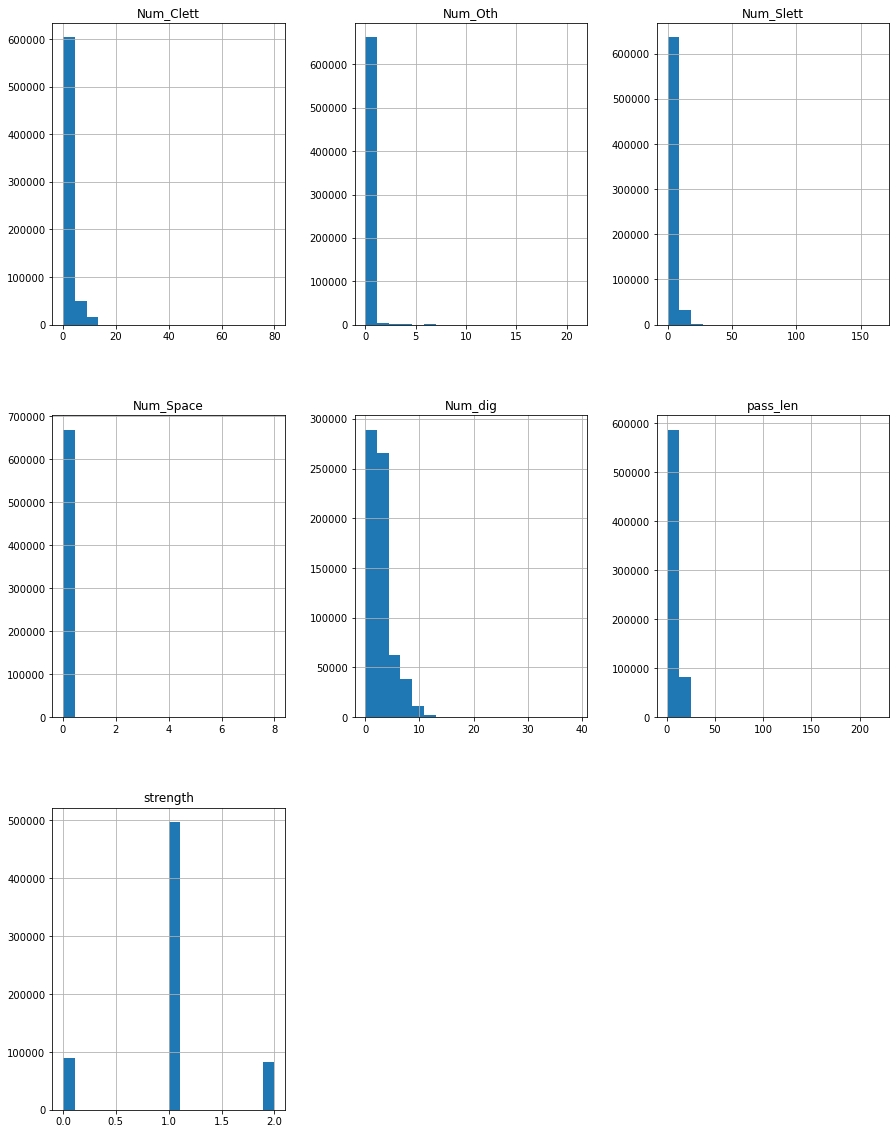

In [26]:
# Histogram of all numeric features
dfNoPass=data.drop('password',axis=1)#no need the 'password' column because we split every password into its components
dfNoPass.hist(bins=18, figsize=(15,20))
plt.show()

**conclusions from the histograms:**<br>
1.Most passwords contain 0-20 uppercase letters.<br>
2.Most passwords contain 0-5 different signs (which are not letters/numbers/spaces).<br>
3.Most passwords contain 0-25 lowercase letters.<br>
4.Most passwords contain 0-10 digits.<br>
5.Most of the password have strength of 1 (alredy knew it from above code)<br>
6.Most of the passwords lenght are in the range 1-25.<br>
7.Its look like most of the password dont have spaces, but because its graph we cant be sure, lets check it..<br>



In [27]:
#To be more specific abour conclusion #7:
space=dfNoPass.groupby(['Num_Space']).count()
print ("Most of the passwords have:", space['strength'].idxmax(),"spaces.")
print ("Fewest passwords have:", space['strength'].idxmin(),"spaces.")


Most of the passwords have: 0 spaces.
Fewest passwords have: 6 spaces.


In [28]:
data

,password,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
0,kzde5577,1,8,4,0,4,0,0
1,kino3434,1,8,4,0,4,0,0
2,visi7k1yr,1,9,2,0,7,0,0
3,megzy123,1,8,3,0,5,0,0
4,lamborghin1,1,11,1,0,10,0,0
...,...,...,...,...,...,...,...,...
669635,10redtux10,1,10,4,0,6,0,0
669636,infrared1,1,9,1,0,8,0,0
669637,184520socram,1,12,6,0,6,0,0
669638,marken22a,1,9,2,0,7,0,0


In [29]:
#there is no need in password column because we split every password into its components
#so i'll delete this column:
data.drop('password',axis=1,inplace=True)
data

,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
0,1,8,4,0,4,0,0
1,1,8,4,0,4,0,0
2,1,9,2,0,7,0,0
3,1,8,3,0,5,0,0
4,1,11,1,0,10,0,0
...,...,...,...,...,...,...,...
669635,1,10,4,0,6,0,0
669636,1,9,1,0,8,0,0
669637,1,12,6,0,6,0,0
669638,1,9,2,0,7,0,0


In [30]:
#before we're getting started,let's check all types of each column, because we need all to be in float/int type because of sklearn
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669639 entries, 0 to 669639
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   strength   669639 non-null  int64
 1   pass_len   669639 non-null  int64
 2   Num_dig    669639 non-null  int64
 3   Num_Space  669639 non-null  int64
 4   Num_Slett  669639 non-null  int64
 5   Num_Clett  669639 non-null  int64
 6   Num_Oth    669639 non-null  int64
dtypes: int64(7)
memory usage: 60.9 MB


In [31]:
#we will compute standard correlation coefficient between every pair of attributes, using the corr() method:
Correlation=data.corr()
Correlation

,strength,pass_len,Num_dig,Num_Space,Num_Slett,Num_Clett,Num_Oth
strength,1.000000,0.836817,0.175469,0.011561,0.226102,0.620512,0.155976
pass_len,0.836817,1.000000,0.168565,0.029406,0.370498,0.667152,0.224570
Num_dig,0.175469,0.168565,1.000000,-0.006568,-0.566564,-0.081351,0.024763
Num_Space,0.011561,0.029406,-0.006568,1.000000,0.010864,0.000789,0.042795
Num_Slett,0.226102,0.370498,-0.566564,0.010864,1.000000,-0.102308,0.097523
Num_Clett,0.620512,0.667152,-0.081351,0.000789,-0.102308,1.000000,0.007073
Num_Oth,0.155976,0.224570,0.024763,0.042795,0.097523,0.007073,1.000000


Text(0.5, 1.0, 'Correlation')

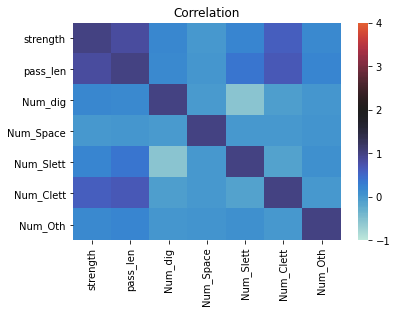

In [32]:
#show correlation as heat map
sns.heatmap(Correlation, center=2, vmin=-1,vmax=4)
plt.title ('Correlation')


as we can see there is no exact 0 values (so there is no excact same values).
we can see there is high correlation beteween Num_Clett,pass_len to strength,(almost 1) means their values increases in corralation.


# <b>split to train set and test set</b>

In [33]:
#split the data into labels and features 
y=data.strength #strength is the label we want to predict
x=data.drop('strength',axis=1)#use drop function to take all other data in x

In [34]:
#split the data to test set and train set 
from sklearn.model_selection import train_test_split #to perform the splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#we will tale 30% of the dataset to testing and the rest for training
#by write random_state=42 we will get same data (same values) in train and test datasets every rime we ran this code.

In [35]:
first_train=x_train
first_test=x_test
check_train=y_train
check_test=y_test
#check the len of the sets:
print("the lenght of first_train is:",len(first_train))
print("the lenght of check_train is:",len(check_train))
print("the lenght of first_test is:",len(first_test))
print("the lenght of check_test is:",len(check_test))

the lenght of first_train is: 468747
the lenght of check_train is: 468747
the lenght of first_test is: 200892
the lenght of check_test is: 200892


# <b>KNN model</b>
## <b> Which n_neighbors should I choose?<b>

First of all I ran for loop about different n_neighbors and checked the accuracy for eack case, <br>
then I chose the n_neighbors that gave me the most acuurate value:<br>


In [36]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:

#please dont run this cell,its very long time to be loaded
#i ran it in the start to see which n neighbors will be the best to choose
scores=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)

#fit the model with data
    knn.fit(first_train,check_train)

# predict the response for new observations
    from sklearn.model_selection import cross_val_score #import cross validation method

    score=cross_val_score(knn,first_train,check_train,cv=2).mean()
    print("Accuracy for k="+str(i)+" is "+str(score) )
    scores.append(score)
    

Accuracy for k=1 is 0.9999743998361588
Accuracy for k=2 is 0.9999530663480865
Accuracy for k=3 is 0.9999615997542383
Accuracy for k=4 is 0.999940266266166
Accuracy for k=5 is 0.9999402662570636
Accuracy for k=6 is 0.999938132914628
Accuracy for k=7 is 0.9999338662388592
Accuracy for k=8 is 0.9999189328509124
Accuracy for k=9 is 0.9999210661751432
Accuracy for k=10 is 0.9999103994447606
Accuracy for k=11 is 0.9999103994447606
Accuracy for k=12 is 0.9999039993992491
Accuracy for k=13 is 0.9999039993992491
Accuracy for k=14 is 0.9998911992900215
Accuracy for k=15 is 0.999895465983995
Accuracy for k=16 is 0.9998890659384836
Accuracy for k=17 is 0.9998954659748926
Accuracy for k=18 is 0.999886932596048
Accuracy for k=19 is 0.9998890659384836


In [38]:
#this is the array of all the accuracies according to different n neighbors
scores

[0.9999743998361588,
 0.9999530663480865,
 0.9999615997542383,
 0.999940266266166,
 0.9999402662570636,
 0.999938132914628,
 0.9999338662388592,
 0.9999189328509124,
 0.9999210661751432,
 0.9999103994447606,
 0.9999103994447606,
 0.9999039993992491,
 0.9999039993992491,
 0.9998911992900215,
 0.999895465983995,
 0.9998890659384836,
 0.9998954659748926,
 0.999886932596048,
 0.9998890659384836]

Text(0, 0.5, 'Cross-Validation Testing Accuracy')

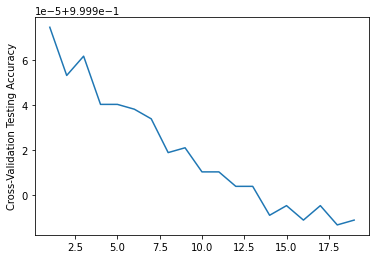

In [39]:
#lets plot the relation between n and testing accuracy
n_neigh=list(range(1,20))
plt.plot(n_neigh,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999X, means- 7,5,,6,4,4,3,3,1.....


**Conclusion**<br>
The most accurate n neighbors is n=1.

## Train, Fit & Predict

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)
#train the model
knn.fit(first_train,check_train)
#predict the values for first_test
Predictions=knn.predict(first_test)

In [ ]:
print("The accuracy for KNN mosel is:",metrics.accuracy_score(check_test,Predictions))

## Model evaluation metrics for classification


### Confusion Matrix

In [41]:
#compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(check_test,Predictions)
CM#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     3, 148952,      2],
       [     0,      1,  25031]], dtype=int64)

Text(0.5, 1.0, 'confusion_matrix')

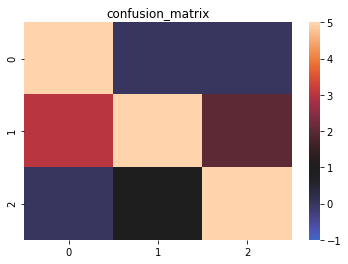

In [42]:
#show CM as heat map
sns.heatmap(CM, center=1, vmin=-1,vmax=5)
plt.title ('confusion_matrix')


**Conclusion**<br>
There are a lot cases where the KNN model predict correctly, **but** there are also few cases where the model prediction is wrong. 

In [43]:
#now, let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method
from sklearn.metrics import classification_report
print (classification_report(check_test,Predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>


In [44]:
from sklearn import metrics
#we'll also check the accuracy by accuracy_score and we can see its almost the same as R2
from sklearn import metrics
accur=metrics.accuracy_score(check_test, Predictions)
print("The Accuracy of this model is:",accur)
print("the Classification Error for this model is:", 1 - accur)

The Accuracy of this model is: 0.9999701332059017
the Classification Error for this model is: 2.986679409833215e-05


## <b>Choosing Dummy Classifier</b><br>
In our class we learned about 4 different kinds of dummy classifiers-<br>
1. most_frequent-**always** predicts the most frequent label in the training set.<br>
2. stratified-generates predictions by respecting the **training set’s class distribution**.<br>
3. uniform-generates predictions uniformly at **random**.<br>
4. constant-always predicts a label that **we provide him**.<br>
**How will we gonna choose the right dummy classifier?**<br>
We will check the accuracy of each dummy classifier and choose the most accurate one.<br>


In [45]:
#most_frequent dummy classifier:
from sklearn.dummy import DummyClassifier
dcM=DummyClassifier(strategy="most_frequent",random_state=42)
dcM.fit(first_train,check_train)
PredictionsM=dcM.predict(first_test)

print("The accuracy of the most_frequent dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsM))


The accuracy of the most_frequent dummy classifier prediction is: 0.7414780080839456


In [46]:
#stratified dummy classifier:
dcS=DummyClassifier(strategy="stratified",random_state=42)
dcS.fit(first_train,check_train)
PredictionsS=dcS.predict(first_test)

print("The accuracy of the stratified dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsS))



The accuracy of the stratified dummy classifier prediction is: 0.5831790215638253


In [47]:
#uniform dummy classifier:
dcU=DummyClassifier(strategy="uniform",random_state=42)
dcU.fit(first_train,check_train)
PredictionsU=dcU.predict(first_test)

print("The accuracy of the uniform dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsU))


The accuracy of the uniform dummy classifier prediction is: 0.3329649762061207


In [48]:
#constant dummy classifier:
dcC=DummyClassifier(strategy="constant",random_state=42, constant=1)#why 1? because we saw that most of the password have this strenght value
dcC.fit(first_train,check_train)
PredictionsC=dcC.predict(first_test)

print("The accuracy of the constant dummy classifier prediction is:",metrics.accuracy_score(check_test,PredictionsC))


The accuracy of the constant dummy classifier prediction is: 0.7414780080839456


As we can see, the accuracy score of both constant dummy classifier and most_frequent dummy classifier is the same,<br>
so we will take the most_frequent dummy classifier. <br>
Next level we'll create ROC (receiver operating characteristic curve) for each model-KNN and the dummy one,<br>
and also compute the AUROC.<br>by that we will get better interpretation about our model and it ability to predict.<br>
We need to get AUROC bigger than the AUROC of the Dummy Classifier, why? because than we know our model's False Positive Rate<br>
is smaller than the FPR off the Dummy Classifier.

## <b>ROC curves and AUROC </b><br>
### <b> AUROC<b>

In [49]:
#to get the auroc roc curves we will use Scikit-Learn’s roc_curve, roc_auc_score functions:
from sklearn.metrics import roc_curve, roc_auc_score

#auc_knn=roc_auc_score(check_test,Predictions,multi_class="ovr")#why to add the multi_class?the defoult value of multiclass is raise which raises an error,so we need to change it to ovr\ovo
#auc_dum=roc_auc_score(check_test,PredictionsM,multi_class="ovr")
#now because we use multiclass, we need to change the values of predictions -this must be probability estimates which sum to 1. 
Pred_knn_prob=knn.predict_proba(first_test)
Pred_dum_prob=dcM.predict_proba(first_test)
print (Pred_knn_prob)#here it eill show me the probability to choose each label of every password i test
auc_knn=roc_auc_score(check_test,Pred_knn_prob,multi_class="ovr")#why to add the multi_class?the defoult value of multiclass is raise which raises an error,so we need to change it to ovr\ovo
auc_dum=roc_auc_score(check_test,Pred_dum_prob,multi_class="ovr")


print ("The AUROC of the dummy model is:",auc_dum)
print ("The AUROC of the knn model is:",auc_knn)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
The AUROC of the dummy model is: 0.5
The AUROC of the knn model is: 0.9999797690684297


**Conclusion**<br>
The ares of KNN model is bigger than area of Dummy model,therefore the False Positieve Rate in KNN model is smaller-<br>
so we can concluse the model id better.

### <b> ROC curve<b>

In [50]:
#metrics.plot_roc_curve(knn,first_test,check_test)

In [51]:
#y_pred_prob=knn.predict_proba(first_test)[:,2]
#y_pred_prob

In [52]:
# histogram of predicted probabilities
#plt.hist(y_pred_prob, bins=8)
#plt.xlim(0, 2)


In [53]:
#store the predicted probabilities for class 1
#y_pred_prob=knn.predict_proba(first_test)[:,1]
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)


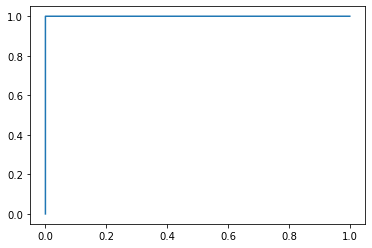

In [54]:
#y_score = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(check_test, Predictions,pos_label=[2])
#fpr, tpr, _ = metrics.roc_curve(check_test, Predictions,pos_label=[0])
#knnfpr, knntpr, thresholds = metrics.roc_curve(check_test, PredictionsNew)
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot(fpr, tpr)

In [55]:
#from sklearn.metrics import RocCurveDisplay
#k_probs=[0 for _ in range(len(check_test))]
#PredictionsNew=knn.predict_proba(first_test)
#PredictionsNew=PredictionsNew[:,1]
#knnfpr, knntpr, _ = metrics.roc_curve(check_test, PredictionsNew)


In [56]:
#KnnFP,KnnTP,_= roc_curve(check_test,PredictionsNew)
#dumFP,dumTP,_= roc_curve(check_test,PredictionsMNew)

# <b>Better Evaluation Using Cross-Validation</b>

In [57]:
from sklearn.model_selection import cross_val_score #import cross validation method
#most of the time the recommadation is to choose cv=10, let's check it
scores=[]
for i in range(2,20): 
    score=cross_val_score(knn,first_train,check_train,cv=i).mean()
    print("Accuracy for cv="+str(i)+" is "+str(score) )
    scores.append(score)

Accuracy for cv=2 is 0.9999743998361588


KeyboardInterrupt: 

In [ ]:
scores

In [ ]:
max_num=max(scores) #find the max number from the list
max_index = scores.index(max_num) #for the max number , find its index

print("The CV will give us the best Cross Validation Score is: CV =",max_index+2 ) #increase by 2 because we started when CV=2.
print("The cross validation score of this model is:", max_num)

In [ ]:
#lets plot the relation between cv and testing accuracy
cv=list(range(2,20))
plt.plot(cv,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999XX, means- 74,70,74,67,76.....
#as we compute, the best CV is when CV=12

# <b>Second model:Logistic Regression</b>
## Fit & Predict

In [58]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_reg = LogisticRegression()

# fit the model with data
log_reg.fit(first_train,check_train)

#make predictions on the testing set
predictionLog = log_reg.predict(first_test)



C:\Users\yuval\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion Matrix

In [59]:
#compute confusion_matrix by using Scikit-Learn’s confusion_matrix() function:
from sklearn.metrics import confusion_matrix
CMLog=confusion_matrix(check_test,predictionLog)
CMLog#It's a 3x3 matrix because there are 3 response classes (0,1,2)

array([[ 26903,      0,      0],
       [     1, 148956,      0],
       [     0,      0,  25032]], dtype=int64)

**conclusion**<br>
According to the Confusion Matrix, in Logistic Regression we have more cases the model prediction were correct than KNN model.<br>
Also, according to the heat map below, we can see the predict here is better than KNN's predict by the appearing of more 'cold' colors (blue, black)<br> than 'hot' colors (red,brown).

Text(0.5, 1.0, 'confusion_matrix')

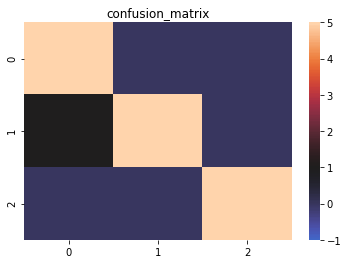

In [60]:
#show CM as heat map
sns.heatmap(CMLog, center=1, vmin=-1,vmax=5)
plt.title ('confusion_matrix')


In [61]:
#now, let's compute precision, recall, f1-score and accuracy by using Scikit-Learn’s classification_report() method
from sklearn.metrics import classification_report
print (classification_report(check_test,predictionLog))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26903
           1       1.00      1.00      1.00    148957
           2       1.00      1.00      1.00     25032

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892



**Accuracy,Classification Error (Misclassification Rate) :** Overall, how often is the classifier incorrect?<br>


In [62]:
#we'll also check the accuracy by accuracy_score 
accurlog=metrics.accuracy_score(check_test, predictionLog)
print("The Accuracy of this model is:",accurlog)
print("the Classification Error for this model is:", 1 - accurlog)

The Accuracy of this model is: 0.9999950222009836
the Classification Error for this model is: 4.977799016425699e-06


**Conclusion**<br>
The Accuracy in Logistic Regression is better than the Accuracy in KNN model,<br>
therefore, also the Classification Error is smaller.

## Choosing Dummy Classifier
Same way as we alrady explained before, we will choose the best Dummy Classifier and compare it to our model.
The best Dummy Classifier as we already compute is the most_frequent Dummy Classifier, with Accuracy of $0.7414780080839456$.<br>
Next level we'll create ROC (receiver operating characteristic curve) for each model-KNN and the dummy one,<br>
and also compute the AUROC.<br>by that we will get better interpretation about our model and it ability to predict. 


## <b>ROC curves and AUROC </b><br>
### <b> AUROC<b>

In [63]:
#to get the auroc roc curves we will use Scikit-Learn’s roc_curve, roc_auc_score functions:
from sklearn.metrics import roc_curve, roc_auc_score

#now because we use multiclass, we need to change the values of predictions -this must be probability estimates which sum to 1. 
Pred_log_prob=log_reg.predict_proba(first_test)
Pred_dum_prob=dcM.predict_proba(first_test)
auc_dum=roc_auc_score(check_test,Pred_dum_prob,multi_class="ovr")
auc_log=roc_auc_score(check_test,Pred_log_prob,multi_class="ovr")
print ("The AUROC of the Logistic Regression model is:",auc_log)
print ("The AUROC of the Dummy model is:",auc_dum)
print ("The AUROC of the KNN model is:",auc_knn)

The AUROC of the Logistic Regression model is: 1.0
The AUROC of the Dummy model is: 0.5
The AUROC of the KNN model is: 0.9999797690684297


**Conclusion**<br>
We can see that the area of the Logistic Regression model is bigger than the Dummy model, and even 'perfect'-<br>
because we have no FPR (False Positieve Rate)

In [64]:
#Pred_log_prob=log_reg.predict_proba(first_test)
#Pred_dum_prob=dcM.predict_proba(first_test)
#auc_log=roc_auc_score(check_test,predictionLog,multi_class="ovr")#why to add the multi_class?the defoult value of multiclass is raise which raises an error,so we need to change it to ovr\ovo
#auc_dum=roc_auc_score(check_test,Pred_dum_prob,multi_class="ovr")


#print ("The AUROC of the dummy model is:",auc_dum)
#print ("The AUROC of the knn model is:",auc_knn)

AxisError: axis 1 is out of bounds for array of dimension 1

### <b> ROC curve<b>

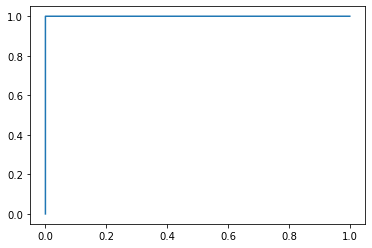

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(check_test, Predictions,pos_label=[0])
plt.plot(fpr, tpr)

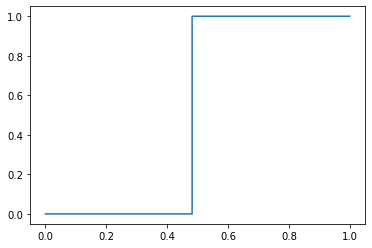

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(check_test, Predictions,pos_label=[1])
plt.plot(fpr, tpr)

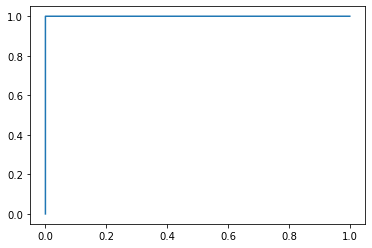

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(check_test, Predictions,pos_label=[2])
plt.plot(fpr, tpr)

# <b>Better Evaluation Using Cross-Validation</b>

In [ ]:
#most of the time the recommadation is to choose cv=10, let's check it
scores=[]
for i in range(2,20): 
    score=cross_val_score(log_reg,first_train,check_train,cv=i).mean()
    print("Accuracy for cv=",i," is ",score )
    scores.append(score)

In [ ]:
scores

In [ ]:
max_num=max(scores) #find the max number from the list
max_index = scores.index(max_num) #for the max number , find its index

print("The CV will give us the best Cross Validation Score is: CV =",max_index+2 ) #increase by 2 because we started when CV=2.
print("The cross validation score of this model is:", max_num)

In [ ]:
#lets plot the relation between cv and testing accuracy
cv=list(range(2,20))
plt.plot(cv,scores)
plt.ylabel('Cross-Validation Testing Accuracy')#show the number of 0.9999XX, means- 74,70,74,67,76.....
#as we compute, the best CV is when CV=12

# <b>Final Accuracy Visualization </b>

<BarContainer object of 3 artists>

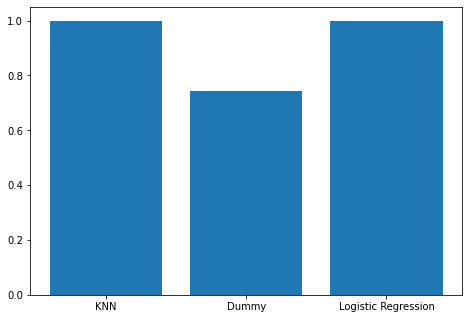

In [67]:
DumAc=metrics.accuracy_score(check_test,PredictionsM)
KnnAc=metrics.accuracy_score(check_test,Predictions)
LogAC=accurlog
figure=plt.figure()
Accu=[KnnAc,DumAc,LogAC]
axes=figure.add_axes([0,0,1,1])#determine the size of the figure- (0,0) is the lower left point of the new axes in figure coodinates,1 its width and 1 height 
axes.bar(['KNN','Dummy','Logistic Regression'],Accu)

In [ ]:
# compare actual response values (y_test) with predicted response values (y_pred)
#print("The accuracy of the Logistic Regression classifier model's prediction is:",metrics.accuracy_score(check_test,predictionLog))

In [ ]:
#sns.pairplot(data, x_vars='pass_len', y_vars='strength', height=7, aspect=0.7, kind='scatter')


In [ ]:
#plt.scatter(data['review_taste'],BeerReviews['review_overall'])

In [ ]:
#sns.pairplot(data, x_vars='pass_len', y_vars='strength', height=7, aspect=0.5, kind='reg')

In [ ]:
#i would like to create new column of pass_len represent the lenght of each password
#data['pass_len']=data['password']
#for i in data.index:
 #   data.loc[i, 'pass_len']=len(data.loc[i, 'password'])



In [ ]:
#lets start with 
#create the new column
#data['pass_len']=data['password'].str.len()#in every cell put the length of the password
#data['password']=data['password'].astype(str)


#def countSpace (x):
 #   space=0
  #  for i in x:
   #     if x[i].isspace()== True:
    #        space=space+1
    #return space

#data['Num_Spa']=countSpace (data['password'])


#data['Num_Clet']=len(re.sub("[^A-Z]", "",data['password']))
#data['Num_Clet']=data['password'].apply(lambda x: if()
#data['password'].str.len()#in every cell put the length of the password

#also can be write as:
#data['pass_len']=data['password'].apply(lambda x: len(x))
#data

In [ ]:
#data['Num_Clet']=np.nan
#data['Num_Clet']=""

#for i in data.index:
    #data['Num_Clet'][i]=len(re.sub("[^A-Z]", "",data['password'][i]))
 #   data['Num_Clet'][i].fillna(len(re.sub("[^A-Z]", "",data['password'][i])))
#data

In [ ]:
#import re
#my_string="12ed3F!."
#len(re.sub("[^a-zA-Z]", "", my_string))
#len(re.sub("[^0-9]", "", my_string))
#len(re.sub("[^A-Z]", "", my_string))
#len(re.sub("[^a-z]", "", my_string))
#len(re.sub("[^+,<,>,|,\,/,?,.,!]", "", my_string))
#s="y "
#len(s)

In [ ]:
#for i in range(1,20):
    #knn = KNeighborsClassifier(n_neighbors=i, weights='distance')

# fit the model with data
    #knn.fit(first_train,check_train)

# predict the response for new observations
    #score = knn.score(first_train,check_train)
    #print("Accuracy for k="+str(i)+" is "+str(score*100)+"%")

In [ ]:
#for i in range(1,20):
 #   knn = KNeighborsClassifier(n_neighbors=i)

# fit the model with data
  #  knn.fit(first_train,check_train)

# predict the response for new observations
   # score = knn.score(first_train,check_train)
    #print("Accuracy for k="+str(i)+" is "+str(score)()

In [ ]:
#compute classification accuracy for the KNN model
#from sklearn import metrics
#print (metrics.accuracy_score(check_test,Predictions))

In [ ]:
#now we gonna measure this classification model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error() function:
#from sklearn.metrics import mean_squared_error
#MSE=mean_squared_error(check_test,Predictions)#Mean Square Error   
#RMSE=np.sqrt(MSE)#Root Mean Square Error
#print("The RMSE of the prediction is:", RMSE)#as we can see, the RMSE is  and its good because its reflect the model’s good ability to predict the values (indicates a small deviation)

In [ ]:
#now we gonna measure this classification model’s R2 on the whole training set using Scikit-Learn’s r2_score() function:
#from sklearn.metrics import r2_score
#R2=r2_score(check_test,Predictions)
#print ("The R2 score of the prediction is:", R2)